In [2]:
import matplotlib.pyplot as plt
import math
import random


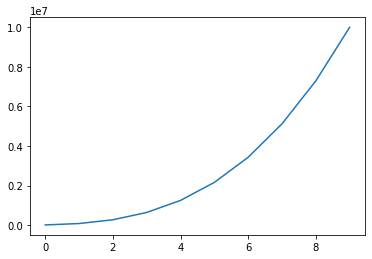

In [3]:
plt.plot(stakers)

[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000]
3850000
[7010, 36601, 86835, 160057, 239850, 370225, 500041, 631039, 832994, 985345]
3849997
0.701
0.915025
0.9648333333333333
1.00035625
0.9594
1.0284027777777778
1.0204918367346938
0.9859984375
1.0283876543209876
0.985345


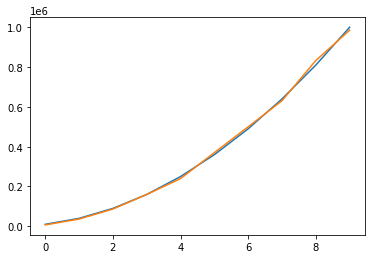

In [49]:
# Proof for issue Small stakers will not get rewards for voting coherently #185
# https://github.com/razor-network/contracts/issues/185

stakers=[]
for i in range(1,11):
    stakers.append(10000*i*i)
    
print(stakers)
stakersBefore = stakers.copy()
print(sum(stakers))

plt.plot(stakers)
epochs=100000
exposure=1000
minStake=1000
chancePenalty=0.01

rewardPool=0
    

for e in range(epochs):
    stakeGettingReward=0
    stakersGettingReward=[]
    for i in range(len(stakers)):
        if(random.random()<chancePenalty):
            penalty = (stakers[i]//exposure)
            stakers[i]-=penalty
            rewardPool+=penalty
        stakeGettingReward+=stakers[i]
#     print("rewardPool",rewardPool)
#     print("stakeGettingReward",stakeGettingReward)
#     print("stakersGettingReward",stakersGettingReward)
    
    
    rewardLeft=rewardPool
    for j in range(len(stakers)):
        reward = (stakers[j]*rewardPool)//stakeGettingReward
#         print("reward",reward)
        #print("reward",reward)

        stakers[j]+=reward
        rewardLeft=rewardLeft-reward
    rewardPool=rewardLeft
#     print(stakers)

print(stakers)

print(sum(stakers))
plt.plot((stakers))
#     print("rewardLeft",rewardLeft)

for i in range(len(stakers)):
    print(stakers[i]/stakersBefore[i])

[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000]
3850000
[52137.99285339663, 136276.56163181452, 246161.36205102253, 362289.71629868314, 449005.3519572227, 511386.6037304925, 437677.3890760954, 527181.4736248982, 537428.425422386, 590455.1233540003]
3850000.000000011
5.213799285339663
3.406914040795363
2.7351262450113616
2.2643107268667695
1.7960214078288907
1.4205183436958126
0.8932191613797866
0.8237210525389035
0.6634918832375136
0.5904551233540003


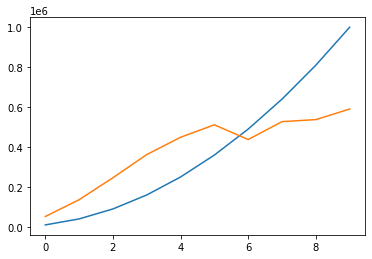

In [53]:
# Issue: current reward formula doesnt provide equitable distribution
# Big stakers are drained slowly and smaller stakers are rewarded.

stakers=[]
for i in range(1,11):
    stakers.append(10000*i*i)
    
print(stakers)
stakersBefore = stakers.copy()
print(sum(stakers))

plt.plot(stakers)
epochs=1000000
exposure=1000
minStake=1000
chancePenalty=0.01

rewardPool=0
    

for e in range(epochs):
    stakeGettingReward=0
    stakersGettingReward=[]
    penalized=[]

    for i in range(len(stakers)):
        if(random.random()<chancePenalty):
            penalty = (stakers[i]/exposure)
            stakers[i]-=penalty
            rewardPool+=penalty
            penalized.append(i)
        else:
            stakeGettingReward+=stakers[i]
#     print("rewardPool",rewardPool)
#     print("stakeGettingReward",stakeGettingReward)
#     print("stakersGettingReward",stakersGettingReward)
    
    rewardLeft=rewardPool
    for j in range(len(stakers)):
        if j in penalized:
            continue
        reward = (stakers[j]*rewardPool)/stakeGettingReward
#         print("reward",reward)
        #print("reward",reward)

        stakers[j]+=reward
        rewardLeft=rewardLeft-reward
    rewardPool=rewardLeft
#     print(stakers)

print(stakers)

print(sum(stakers))
plt.plot((stakers))
#     print("rewardLeft",rewardLeft)

for i in range(len(stakers)):
    print(stakers[i]/stakersBefore[i])